# Day Clustering

In [44]:
import polars as pl
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True

In [45]:
outlier = pl.read_csv(r'C:\Users\pana\Desktop\DATA\ckw\outliers.csv')
outlier =outlier.to_numpy()
print("no of outliers are ",len(outlier))

no of outliers are  1657


## Loading files containing the day energy consumption patterns of the households

In [46]:
days ='week' #change as per your file name
# Function to extract numeric part from file name
def extract_numeric_part(file_path):
    match = re.search(rf'(\d+)_{days}_data\.csv', file_path)
    if match:
        return int(match.group(1))
    else:
        print(f"Warning: Filename {file_path} does not match pattern")
        return None

# Get the list of file paths
file_paths = glob.glob(rf'C:\Users\pana\Desktop\DATA\ckw\2021\{days}\*_{days}_data.csv')
file_paths = sorted(file_paths, key=extract_numeric_part)

file_paths = [file_paths[i] for i in range(len(file_paths)) if i not in outlier]
print("number of datasets remaining", len(file_paths))
print(file_paths[:2])

number of datasets remaining 52203
['C:\\Users\\pana\\Desktop\\DATA\\ckw\\2021\\week\\0_week_data.csv', 'C:\\Users\\pana\\Desktop\\DATA\\ckw\\2021\\week\\1_week_data.csv']


Loading data
Choose the column name containing the energy consumption values

In [47]:
#select day or avergae to cluster
cluster_value = 'normalized_week' # week_avg or normalized_week
def load_days(file_paths):
    
    n_time_series = len(file_paths) #each time series represents 1 smart meter data

    # Number of timestamps per time series ( 96 intervals per day)
    n_timestamps = 96
    
    dataframes = []
    for idx,file_path in enumerate(file_paths):
        #print("filepath",file_path)
        df = pl.read_csv(file_path)
    #    df = df[standard_order]
        dataframes.append(df)
    #print("files read of length",len(dataframes))
    combined_df=pl.concat(dataframes)
    #print("combined array after ",combined_df)

    values_array=combined_df[cluster_value].to_numpy()
    #print(values_array)
    data_3d= values_array.reshape((n_time_series,n_timestamps,1))

    print("Shape of the 3D array:", data_3d.shape)
    return data_3d

Shape of the 3D array: (52203, 96, 1)


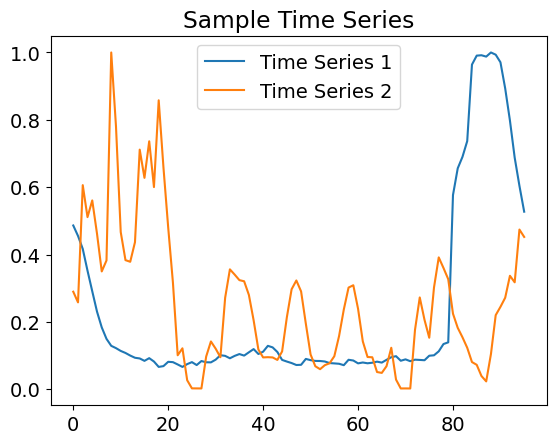

In [48]:
train_data= load_days(file_paths)
# Check for NaN values
if np.any(np.isnan(train_data)):
    print("Data contains NaN values")

# Plot a subset of the data checking dataset
plt.plot(train_data[0][:, 0], label='Time Series 1')
plt.plot(train_data[10][:, 0], label='Time Series 2')
plt.legend()
plt.title('Sample Time Series')
plt.show()
# to ensure that the data is different and doesnt have any NaN values

# Validation Metric
Default runs Davies-Bouldin, Silhoutte score and Calinski Harabasz scores can be plotted by uncommenting few lines

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
seed_random = 42

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2,26)
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1]))

#fig, ax = plt.subplots(12, 2, figsize=(15,8))
for n_clusters in k_values_to_try:
    
    print(n_clusters)
    #Perform clustering.
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    )
    labels_clusters = kmeans.fit_predict(train_data)
    q, mod = divmod(n_clusters, 2)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    #silhouette = silhouette_score(train_data, labels_clusters)
    #ch = calinski_harabasz_score(train_data, labels_clusters)
    db = davies_bouldin_score(train_data, labels_clusters)
    tmp_scores = {"no_of_clusters": n_clusters,
     #             "silhouette_score": silhouette,
     #             "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)
    
#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pl.DataFrame(df_scores)
#df_scores.set_index("no_of_clusters", inplace=True)

2


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



3


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



4


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



6


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



7


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



8


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



10


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



11


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



12


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



13


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



14


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



15


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



16


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



17


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



18


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



19


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



20


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



21


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



22


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



23


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



24


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



25


C:\Users\pana\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



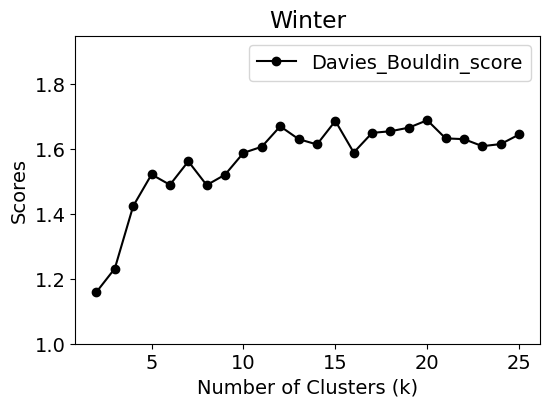

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
#plt.plot(df_scores['no_of_clusters'][:25],df_scores['silhouette_score'][:25],label="silhouette_score", marker ='o', color='orange')
plt.plot(df_scores['no_of_clusters'],df_scores['davies_bouldin_score'],label= "Davies_Bouldin_score", marker = 'o', color='black')
#plt.plot(df_scores['no_of_clusters'],df_scores['calinski_harabasz_score'],label= "calinski_harabasz_score", marker = 'o')
plt.title(f"Winter")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Scores')
#plt.xticks(k_values_to_try)
plt.ylim(1.0,1.95)
plt.legend(loc='upper right') 
plt.grid(False)
#plt.savefig(rf'C:\Desktop\plots\\normalized\Davies_Score_{season}_{days}.png')
plt.show()

# K-means Clustering
change n_clusters as required

In [49]:
from tslearn.clustering import TimeSeriesKMeans

n_clusters = 10  # Number of clusters, you can adjust this
max_iterations =100

kmeans = TimeSeriesKMeans(n_clusters=n_clusters,max_iter=max_iterations, verbose=True, random_state=42, n_jobs=-1)
clusters_train = kmeans.fit_predict(train_data)

3.265 --> 2.326 --> 2.272 --> 2.241 --> 2.219 --> 2.203 --> 2.194 --> 2.189 --> 2.185 --> 2.182 --> 2.180 --> 2.178 --> 2.177 --> 2.176 --> 2.176 --> 2.175 --> 2.174 --> 2.174 --> 2.173 --> 2.173 --> 2.172 --> 2.172 --> 2.172 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 2.171 --> 


Saving the cluster indices

In [11]:
#Saving the cluster_indices

# Initialize an empty list to store individual DataFrames for each cluster
cluster_dataframes = []

for cluster_idx in range(n_clusters):
    # Get all indices in this cluster
    cluster_indices = np.where(clusters_train == cluster_idx)[0]
    
    # Create a Polars DataFrame for the current cluster's indices
    cluster_df = pl.DataFrame({
        "cluster": pl.Series([cluster_idx + 1] * len(cluster_indices)),
        "index": pl.Series(cluster_indices)
    })
    
    # Append this cluster DataFrame to the list
    cluster_dataframes.append(cluster_df)

# Concatenate all cluster DataFrames into one
cluster_indices_df = pl.concat(cluster_dataframes)

# Check if 13921(outlier) is in the 'index' column
number_to_check = 13921
exists = cluster_indices_df['index'].is_in([number_to_check]).any()

# Print the DataFrame to verify
print("\nCluster Indices DataFrame:")
print(cluster_indices_df.head())

#cluster_indices_df.write_csv(rf'C:\DATA\{season}_avg_{n_clusters}_indices.csv')


Cluster Indices DataFrame:
shape: (5, 2)
┌─────────┬───────┐
│ cluster ┆ index │
│ ---     ┆ ---   │
│ i64     ┆ i64   │
╞═════════╪═══════╡
│ 1       ┆ 1     │
│ 1       ┆ 7     │
│ 1       ┆ 8     │
│ 1       ┆ 9     │
│ 1       ┆ 16    │
└─────────┴───────┘


# Plotting the cluster average patterns

In [50]:
#in progress
#quick plot
# Calculate and plot the average pattern for each cluster
labels = ['0:00','6:00','12:00','18:00','0:00']

colors= ['black','blue','red','maroon','lightgrey','pink','darkgrey','darkblue','skyblue','indianred','purple','magenta','pink','violet']

def plot_clusters_season(save,type):
    
    plt.figure(figsize=(8,6))
    for cluster_idx in range(n_clusters):
        # Get all time series in this cluster
        cluster_data = train_data[clusters_train == cluster_idx]
        cluster_indices = np.where(clusters_train == cluster_idx)[0]    
    
        # Calculate the mean time series for the cluster
        mean_time_series = np.mean(cluster_data, axis=0)
    
        # Plot the mean time series
        cluster_no = cluster_idx+1
        plt.plot(range(1,97), mean_time_series.ravel(), 
                label= f'{cluster_no} Number of Time Series: {len(cluster_indices)}',
                linewidth =2, color=colors[cluster_idx] )
    plt.title(f"{season} ")
    plt.xlabel("Time")
    plt.ylabel(" Normalized Energy Consumption")
    plt.ylim(0,1)
    #plt.xticks(range(1,108,12),labels=labels)
    plt.xticks(range(1,120,24),labels=labels)
    plt.tight_layout()
    #plt.legend()
    #plt.margins(0)
    plt.grid(True, color = 'lightgray')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    if save==1:
        plot_name=f'{season}_avg_{n_clusters}_clusters.png'
        save_path=rf'C:\Users\Desktop\plots'
        plt.savefig(os.path.join(save_path,plot_name), bbox_inches='tight')
    
    plt.show()

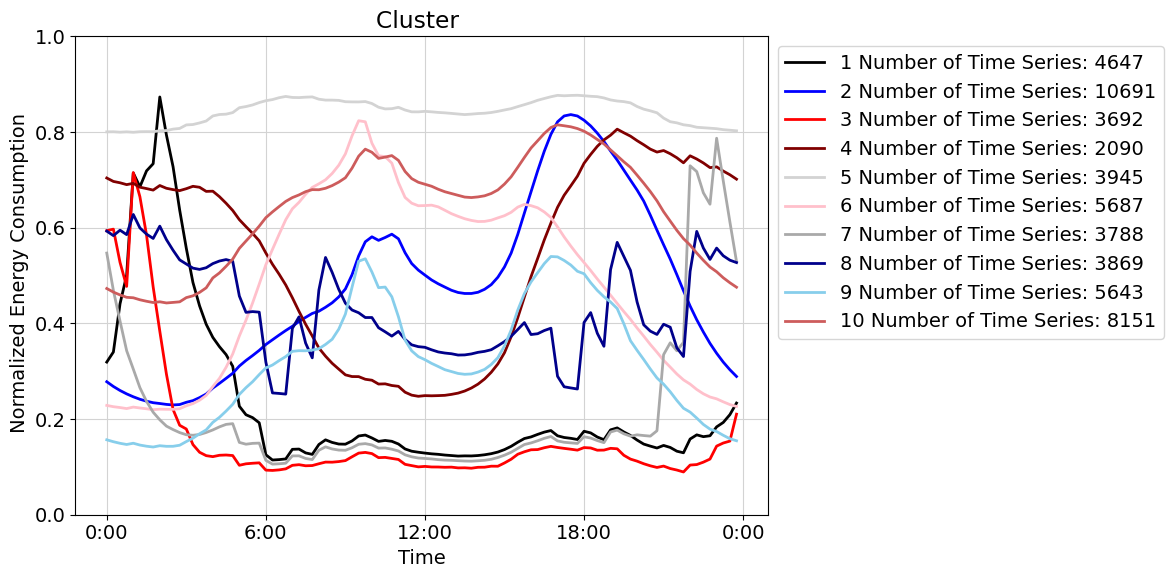

In [51]:
to_save = 0 #if you want to save the plots save=1
seasons= ['Full_year'] #tile of the plot

plot_clusters_season(to_save,'full')

plt.rcParams['font.size'] = 14

### Plotting the clusters in separate plots

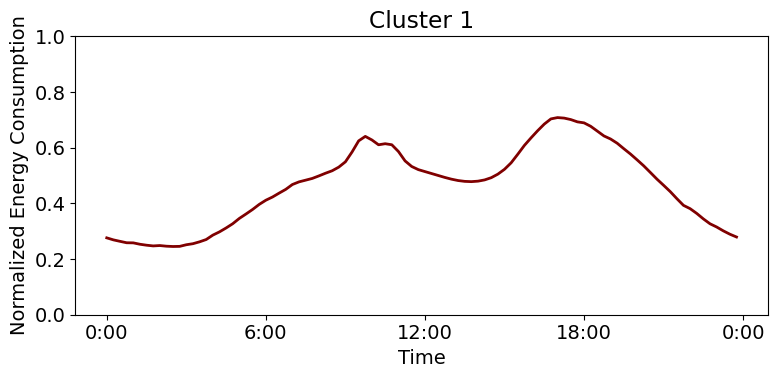

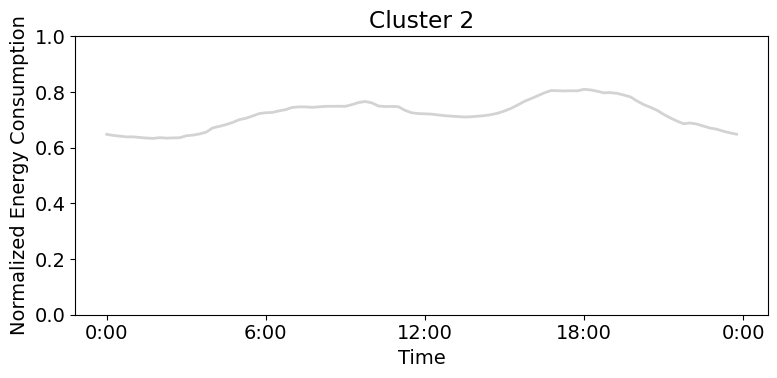

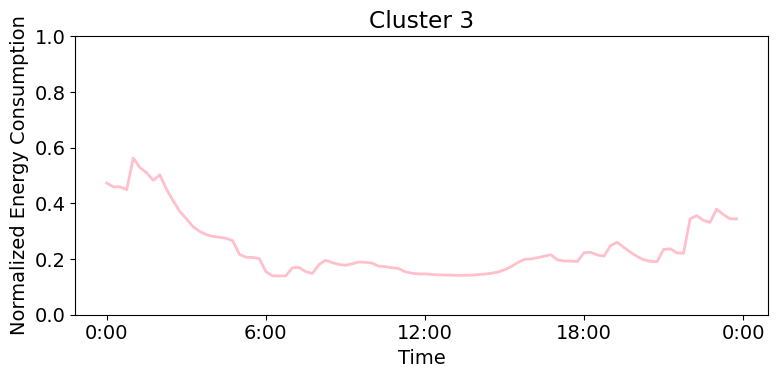

In [23]:
# Calculate and plot the average pattern for each cluster
save = 0 #if you want to save the plots

labels = ['0:00','6:00','12:00','18:00','0:00']
colors= ['maroon','lightgrey','pink','darkgrey','darkblue','skyblue','indianred','purple','darkslategrey','turquoise','magenta','pink','violet']

for cluster_idx in range(n_clusters):
    # Get all time series in this cluster
    cluster_data = train_data[clusters_train == cluster_idx]
    cluster_indices = np.where(clusters_train == cluster_idx)[0]    
    
    
    # Calculate the mean time series for the cluster
    mean_time_series = np.mean(cluster_data, axis=0)
    
    # Plot the mean time series
    plt.figure(figsize=(8, 4))
    
    plt.plot(range(1,97), mean_time_series.ravel()[:96], 
             label= f'Mean Time Series \n No. of Time Series: {len(cluster_indices)}',
               linewidth =2, color= colors[cluster_idx] )
    cluster_no = cluster_idx+1
    plt.title(f"Cluster {cluster_no}")
    plt.xlabel("Time")
    plt.ylabel("Normalized Energy Consumption")
    plt.ylim(0,1)
    plt.xticks(range(1,120,24),labels=labels)
    plt.tight_layout()
    #plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    if save==1:
        plot_name=f'{cluster_idx}_{n_clusters}_{season}_clusters.png'
        save_path=rf'C:\Desktop\plots'
        plt.savefig(os.path.join(save_path,plot_name), bbox_inches='tight')
    plt.show()


### Plotting Mean, Median and percentiles of the clusters

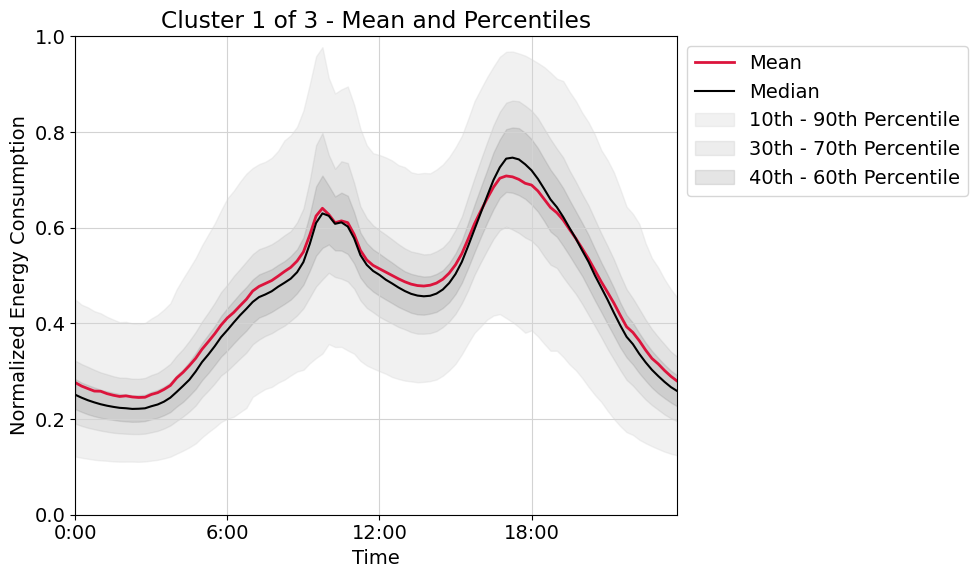

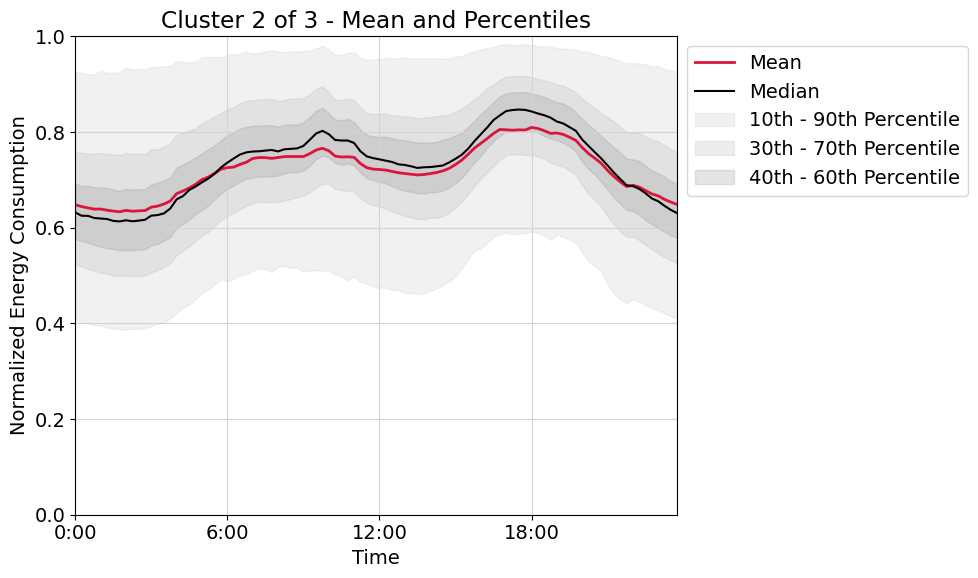

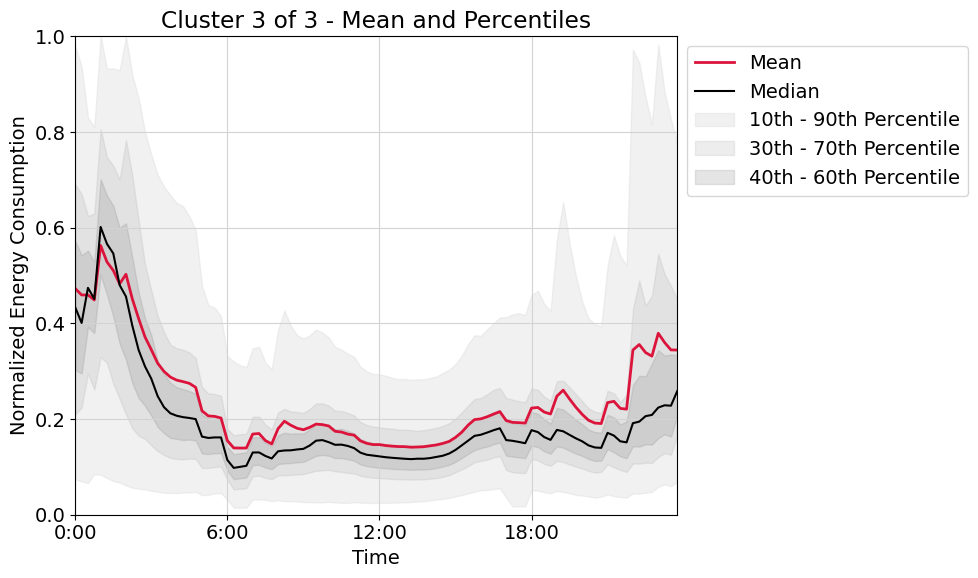

shape: (96, 6)
┌────────────────┬────────────────┬────────────────┬───────────────┬───────────────┬───────────────┐
│ lower_percenti ┆ lower_percenti ┆ lower_percenti ┆ upper_percent ┆ upper_percent ┆ upper_percent │
│ le_cluster_1   ┆ le_cluster_2   ┆ le_cluster_3   ┆ ile_cluster_1 ┆ ile_cluster_2 ┆ ile_cluster_3 │
│ ---            ┆ ---            ┆ ---            ┆ ---           ┆ ---           ┆ ---           │
│ f64            ┆ f64            ┆ f64            ┆ f64           ┆ f64           ┆ f64           │
╞════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ 0.121632       ┆ 0.407633       ┆ 0.074108       ┆ 0.44982       ┆ 0.92659       ┆ 0.979259      │
│ 0.119121       ┆ 0.404461       ┆ 0.0699         ┆ 0.438941      ┆ 0.924113      ┆ 0.936626      │
│ 0.11704        ┆ 0.400235       ┆ 0.066248       ┆ 0.43339       ┆ 0.92061       ┆ 0.830324      │
│ 0.114882       ┆ 0.396288       ┆ 0.084888       ┆ 0.425421      ┆ 0.92043

In [25]:
plt.rcParams['font.size'] = 14

save = 0
save_file = 0
lower_percentile = 10
median_percentile = 50
upper_percentile = 90

# Percentiles to be used for shading
lower_shade_percentile = 30
mid_shade_percentile = 40
upper_shade_percentile = 70
top_shade_percentile = 60

# Initialize lists to store percentile data for each cluster
lower_percentile_columns = []
upper_percentile_columns = []

# Assuming train_weekdays and clusters_train are defined and n_clusters is set
for cluster_idx in range(n_clusters):
    # Get all time series in this cluster
    cluster_data = train_data[clusters_train == cluster_idx]
    
    # Calculate the mean and percentiles for the cluster
    mean_time_series = np.mean(cluster_data, axis=0)
    median_time_series = np.median(cluster_data, axis=0)
    lower_percentile_series = np.percentile(cluster_data, lower_percentile, axis=0)
    median_percentile_series = np.percentile(cluster_data, median_percentile, axis=0)
    
    lower_shade_series = np.percentile(cluster_data, lower_shade_percentile, axis=0)
    mid_shade_series = np.percentile(cluster_data, mid_shade_percentile, axis=0)
    top_shade_series = np.percentile(cluster_data, top_shade_percentile, axis=0)
    upper_shade_series = np.percentile(cluster_data, upper_shade_percentile, axis=0)
    
    upper_percentile_series = np.percentile(cluster_data, upper_percentile, axis=0)

    # Convert to flat arrays if needed
    lower_percentile_series = np.ravel(lower_percentile_series)
    upper_percentile_series = np.ravel(upper_percentile_series)
    lower_shade_series = np.ravel(lower_shade_series)
    mid_shade_series = np.ravel(mid_shade_series)
    top_shade_series = np.ravel(top_shade_series)
    upper_shade_series = np.ravel(upper_shade_series)

    # Store results in lists
    lower_percentile_columns.append(pl.Series(f'lower_percentile_cluster_{cluster_idx+1}', lower_percentile_series))
    upper_percentile_columns.append(pl.Series(f'upper_percentile_cluster_{cluster_idx+1}', upper_percentile_series))
    
    # Plot the mean and percentile bands
    plt.figure(figsize=(10, 6))
    plt.grid( color='lightgray')
    plt.plot(range(1, 97), mean_time_series, label='Mean', color='crimson', linewidth=2)
    plt.plot(range(1, 97), median_time_series, label='Median', color='black', linewidth=1.5)
    
    # Fill between percentiles for shading
    plt.fill_between(range(1, 97), lower_percentile_series, upper_percentile_series, color='lightgray', alpha=0.3, label=f'{lower_percentile}th - {upper_percentile}th Percentile')
    plt.fill_between(range(1, 97), lower_shade_series, upper_shade_series, color='darkgray', alpha=0.2, label=f'{lower_shade_percentile}th - {upper_shade_percentile}th Percentile')
    plt.fill_between(range(1, 97), mid_shade_series, top_shade_series, color='gray', alpha=0.2, label=f'{mid_shade_percentile}th - {top_shade_percentile}th Percentile')
    
    plt.title(f"Cluster {cluster_idx + 1} of {n_clusters} - Mean and Percentiles")
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Normalized Energy Consumption")
    plt.ylim(0, 1)
    plt.yticks(fontsize = 14)
    plt.xticks(range(1, 120, 24), labels=['0:00', '6:00', '12:00', '18:00', '0:00'], fontsize = 14)
    plt.margins(0)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    if save:
        plot_name = f'{cluster_idx}_{n_clusters}_percentiles_{days}_{season}.png'
        save_path = rf'C:\Users\pana\Desktop\plots\without_outliers\{season}\normalized'
        os.makedirs(save_path, exist_ok=True)  # Ensure directory exists
        plt.savefig(os.path.join(save_path, plot_name), bbox_inches='tight')

plt.show()

# Combine results into a Polars DataFrame
cluster_percentiles_df = pl.DataFrame(lower_percentile_columns + upper_percentile_columns)
print(cluster_percentiles_df)

if save_file:
    cluster_percentiles_df.write_csv(rf'C:\Users\pana\Desktop\DATA\ckw\clustering_results\percentiles.csv')


## Sankey Plots for variation of day clusters with seasons
Cluster the seasonal day profiles and save their indices before going ahead

In [29]:
season = 'summer' #example
season_2 = 'winter'
df1 = pl.read_csv(r'C:\Users\pana\Desktop\DATA\ckw\clustering_results\day\Summer_avg_3_indices.csv')
df2 = pl.read_csv(r'C:\Users\pana\Desktop\DATA\ckw\clustering_results\day\Winter_avg_3_indices.csv')

df1_name = f'{season} Cluster (k=3)'
df2_name = f'{season_2} Cluster (k=3)'

In [30]:
# Get unique cluster numbers
df1_clusters = df1['cluster'].unique().to_list()
df2_clusters = df2['cluster'].unique().to_list()


# Dictionary to store the number of common indices
common_indices_dict = {}
list = []

# Loop through each cluster combination
for df1_cluster in df1_clusters:
    for df2_cluster in df2_clusters:
        # Filter the DataFrames for the current clusters
        df1_cluster_indices = df1.filter(pl.col('cluster') == df1_cluster)['index']
        df2_cluster_indices = df2.filter(pl.col('cluster') == df2_cluster)['index']
        
        # Find the intersection of the indices
        common_indices = df1_cluster_indices.is_in(df2_cluster_indices)
        
        # Count the number of common indices
        num_common_indices = common_indices.sum()
        if num_common_indices<10:
            num_common_indices = 0
        list.append(num_common_indices)
        
        # Store the result in the dictionary
        common_indices_dict[(df1_cluster, df2_cluster)] = num_common_indices

# Print the results
for key, value in common_indices_dict.items():
    print(f"Number of common indices between {df1_name} {key[0]} and {df2_name} {key[1]}: {value}")

print(len(list))

Number of common indices between summer Cluster (k=3) 1 and winter Cluster (k=3) 1: 19553
Number of common indices between summer Cluster (k=3) 1 and winter Cluster (k=3) 2: 2534
Number of common indices between summer Cluster (k=3) 1 and winter Cluster (k=3) 3: 1930
Number of common indices between summer Cluster (k=3) 2 and winter Cluster (k=3) 1: 3304
Number of common indices between summer Cluster (k=3) 2 and winter Cluster (k=3) 2: 5508
Number of common indices between summer Cluster (k=3) 2 and winter Cluster (k=3) 3: 470
Number of common indices between summer Cluster (k=3) 3 and winter Cluster (k=3) 1: 3421
Number of common indices between summer Cluster (k=3) 3 and winter Cluster (k=3) 2: 1528
Number of common indices between summer Cluster (k=3) 3 and winter Cluster (k=3) 3: 13955
9


In [35]:
import plotly.graph_objects as go
numbers = np.arange(len(df1_clusters))
repeats = len(df2_clusters)
# Define the connections (links)
# The source and target indices correspond to the labels list
sources = np.repeat(numbers, repeats)  # Adjust sources for two split intermediates
print(sources)

sequence = range(len(df1_clusters), len(df1_clusters) + len(df2_clusters))
targets = np.tile(sequence,len(df1_clusters))

print(targets)

season = "Cluster"
# Define the labels (nodes)
def create_labels(season, num_labels=8):
    return [f"{season} {i+1}" for i in range(num_labels)]


labels = []
labels = create_labels(season, len(df1_clusters))
labels = np.append(labels,create_labels(season, len(df2_clusters)))
print("labels",labels)

values = list   # Adjust values accordingly

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=10,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[ "black", "rgba(0, 0, 275, 0.8)", "red",
               "black", "rgba(0, 0, 275, 0.8)", "red" ,
    #           "magenta","green","rgba(69, 69, 69, 1)", "skyblue", "rgba(227, 119, 194, 1)" 
                'maroon','lightgrey','pink','darkgrey','darkblue','skyblue',
                'indianred','purple','darkslategrey','turquoise','magenta','pink','violet'
                ],
    ),
    link=dict(
        source = sources,  # Indices correspond to labels
        target = targets,
        value = values,
        color = np.tile([  
             #'maroon','lightgrey','pink','darkgrey','darkblue','skyblue','indianred','purple','darkslategrey','turquoise',
             "rgba(0, 0, 0, 0.7)",   # Transparent black
             "rgba(0, 0, 128, 0.8)",   # Transparent navy
             "rgba(205, 45, 22, 0.9)",   # Transparent brown
             "rgba(0,0, 205, 0.7)",  # Transparent medium blue
             "rgba(0, 0, 275, 0.6)", # transparent blue
             "rgba(75, 0, 135, 0.8)",    #magenta
             "rgba(128, 0, 0, 0.7)",   # Transparent grey
             "rgba(250, 0, 0, 0.7)",   # Transparent red
             "rgba(31, 0, 180, 0.8)",  # Transparent blue 0.6 -  transparency 
            
        ],len(df2_clusters)),
    )))

fig.update_layout(title_text="Sankey Diagram", font_size=12, font = dict(color="black"),width = 600, height =500)

fig.show()

[0 0 0 1 1 1 2 2 2]
[3 4 5 3 4 5 3 4 5]
labels ['Cluster 1' 'Cluster 2' 'Cluster 3' 'Cluster 1' 'Cluster 2' 'Cluster 3']


# Cluster specific Time-of-Use price scheme design.

Define the number of segments and alphabet size for the ToU design. 

In [56]:
alphabet_size = 3 #how many different prices per time segment
segments = 8    #how many time segements in a day

In [79]:
def mean_cluster_series(cluster_idx, to_print):
    """
    this function calculates the mean cluster series for each cluster and returns it
        
    """
    colors= ['maroon','lightgrey','pink','darkgrey','darkblue','skyblue',
             'indianred','purple','darkslategrey','turquoise','magenta','pink','violet']
    # Get all time series in this cluster
    cluster_data = train_data[clusters_train == cluster_idx]
    cluster_indices = np.where(clusters_train == cluster_idx)[0]    
    
    # Calculate the mean time series for the cluster
    mean_time_series = np.mean(cluster_data, axis=0)
    labels = ['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','0:00']

    if to_print==1:
        plt.figure(figsize=(8, 4))
        plt.title(f'Cluster {cluster_idx+1}')
        plt.ylabel('Normalized Energy Consumption')
        plt.plot(range(1,97),mean_time_series,#label= f'{cluster_idx} Number of Time Series: {len(cluster_indices)}',
                linewidth =2, color = colors[cluster_idx])
        plt.xlabel('Time of Day')
        plt.ylim(0,1)
        plt.xticks(range(0,107,12), labels=labels, fontsize =10)
        plt.yticks(fontsize =10)
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        #plt.show()

    return mean_time_series

In [76]:
def paa_transform(time_series, segments):
    """
    Perform Piecewise Aggregate Approximation (PAA) on a time series.
    
    Parameters:
        time_series (numpy.array): The time series data to be transformed.
        segments (int): Number of segments to divide the time series into.
        
    Returns:
        numpy.array: The PAA transformed time series.
    """
    n = len(time_series)
    paa_size = segments
    segment_size = n // paa_size
    paa_rep = np.zeros(paa_size)

    for i in range(paa_size):
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < paa_size - 1 else n
        paa_rep[i] = np.mean(time_series[start_idx:end_idx])
    
        
    return paa_rep

In [77]:
from scipy.stats import norm

def sax_transform(paa_rep, alphabet_size=5):
    """
    Transform PAA to SAX representation.
    
    Parameters:
        paa_rep (numpy.array): PAA transformed time series.
        alphabet_size (int): Number of symbols in the SAX alphabet.
        
    Returns:
        str: The SAX representation as a string.
    """
    #breakpoints = norm.ppf(np.linspace(0, 1, alphabet_size + 1)[1:-1])
    breakpoints = np.linspace(0, 1, alphabet_size + 1)[1:-1]  # Uniformly distributed breakpoints between 0 and 1
    
    #print(f"Breakpoints are {breakpoints}")
    sax_rep = []
    for value in paa_rep:
        symbol = np.sum(value > breakpoints)
        sax_rep.append(chr(65 + symbol))  # Mapping to alphabet A, B, C, ...
    
    return ''.join(sax_rep)

def sax_plot(paa_rep, alphabet_size):
    
    #breakpoints = norm.ppf(np.linspace(0, 1, alphabet_size + 1)[1:-1])
    breakpoints = np.linspace(0, 1, alphabet_size + 1)[1:-1]  # Uniformly distributed breakpoints between 0 and 1
    
    #print(f"Breakpoints are {breakpoints}")
    sax_plot = []
    for value in paa_rep:
        symbol = np.sum(value > breakpoints)
        sax_plot.append(symbol)  
    
    return sax_plot

In [78]:
def final_plot(sax, cluster_idx):
    """ This function plots the ToU prices for the cluster index passed """
    prices = np.repeat(sax,12)

    ylabel = ['a', 'b', 'c']
    xlabel = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00', '0:00']


    # Set y-axis ticks to 0, 1, 2, and label them as 'a', 'b', 'c'
    plt.figure(figsize=(7,5))
    plt.yticks([0, 1, 2], labels=ylabel, fontsize=14)
    plt.ylim(-0.25,2.25)
    # Plot the prices data
    plt.plot(range(0, 96), prices, color='red')
    plt.title(f"Cluster {cluster_idx+1}")
    # Set x-axis ticks and labels
    plt.xticks(range(0, 107, 12), labels=xlabel, fontsize=14)
    plt.ylabel("Electricity Price")
    plt.xlabel("Time of Day")
    # Show the plot
    plt.tight_layout()
    plt.savefig(rf'C:\Users\pana\Desktop\plots\sax_final_{cluster_idx}.png')
    plt.show()

PAA Representation: [0.62370411 0.33957025 0.13358916 0.15033158 0.12558173 0.15937621
 0.1624184  0.16835302]
SAX Representation: BBAAAAAA
3
SAX plot: [1, 1, 0, 0, 0, 0, 0, 0]


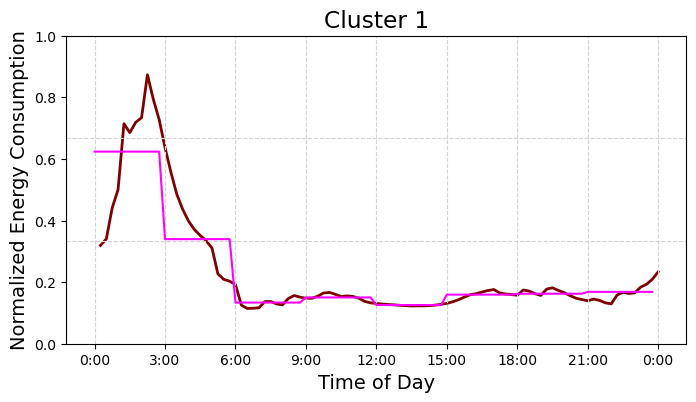

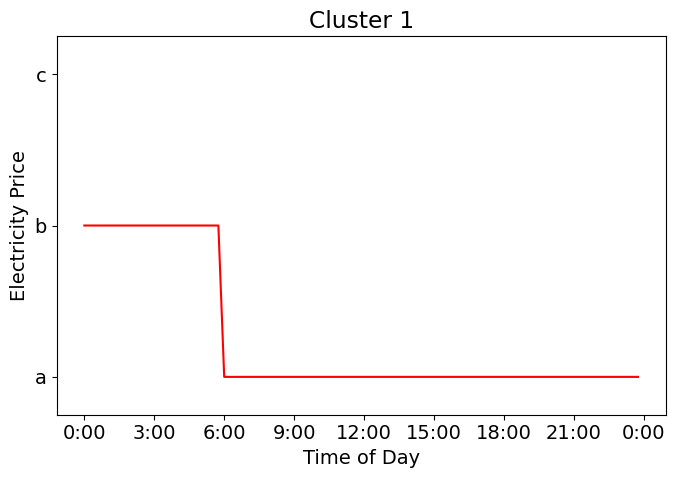

In [71]:
cluster_idx = 0# Sample mean profile of a cluster
mean_profile = mean_cluster_series(cluster_idx, 1)

# Step 1: Apply PAA (e.g., divide into segments)
paa_rep = paa_transform(mean_profile, segments)
print(f"PAA Representation: {paa_rep}")

# Step 2: Convert PAA to SAX with an alphabet size 
sax_rep = sax_transform(paa_rep, alphabet_size)
print(f"SAX Representation: {sax_rep}")

# Step 3: Transforming SAX to plot
sax = sax_plot(paa_rep, alphabet_size)
print(f"SAX plot: {sax}")

repeats = 12
# Define the connections (links)
# The source and target indices correspond to the labels list
paa_plot = np.repeat(paa_rep, repeats)  # Adjust sources for two split intermediates
#print(paa_plot)
breakpoints = np.linspace(0, 1, alphabet_size + 1)[1:-1]
for bp in breakpoints:
        plt.axhline(y=bp, color='lightgray', linestyle='--', linewidth=0.8)
xline = range(0,108,12)
for x in xline:
        plt.axvline(x=x,color='lightgray', linestyle='--', linewidth=0.8)

plt.plot(range(0,96),paa_plot, color ='magenta')
final_plot(sax,cluster_idx)

3


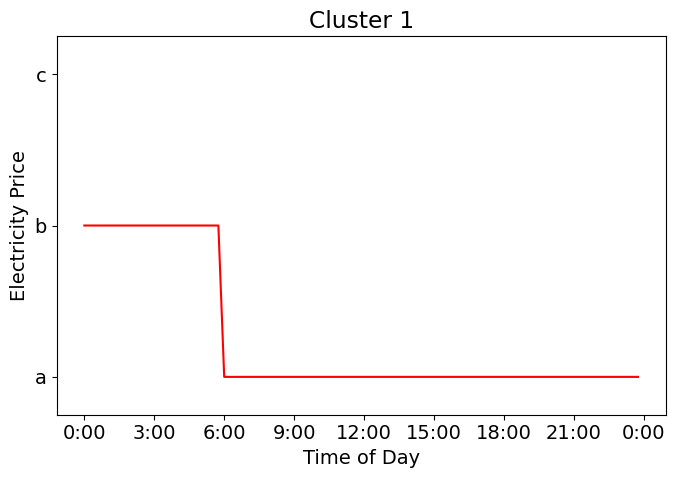

Cluster_1: PAA = [0.62370411 0.33957025 0.13358916 0.15033158 0.12558173 0.15937621
 0.1624184  0.16835302], SAX = BBAAAAAA
3


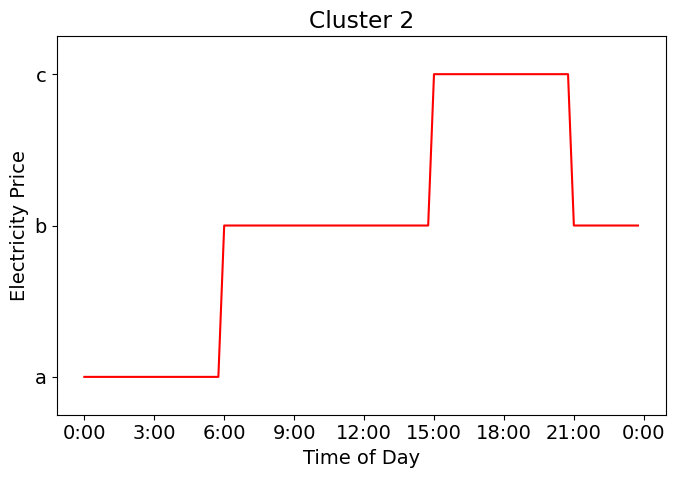

Cluster_2: PAA = [0.24504698 0.28335155 0.40589005 0.54719706 0.47688179 0.71291807
 0.72434407 0.40844497], SAX = AABBBCCB
3


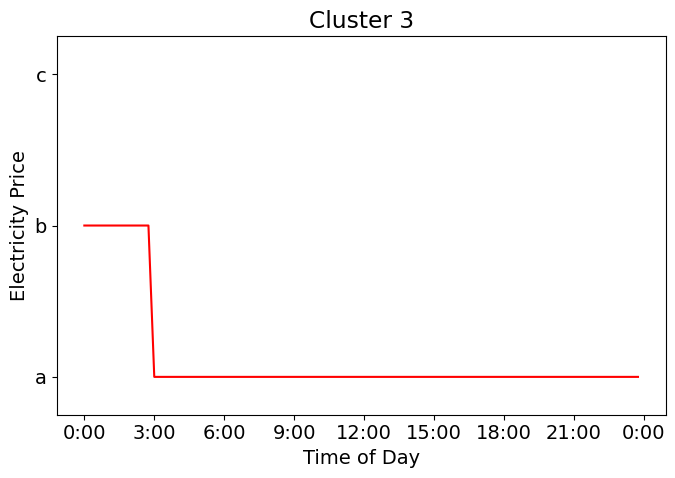

Cluster_3: PAA = [0.47670729 0.12499006 0.10215144 0.11678722 0.09947126 0.13235137
 0.12388389 0.12277303], SAX = BAAAAAAA
3


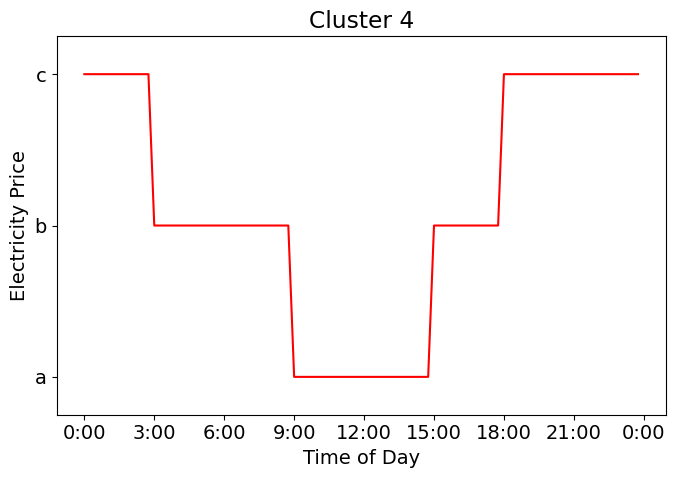

Cluster_4: PAA = [0.68748328 0.64468236 0.41706216 0.27275724 0.26625642 0.54170063
 0.77567514 0.73416493], SAX = CBBAABCC
3


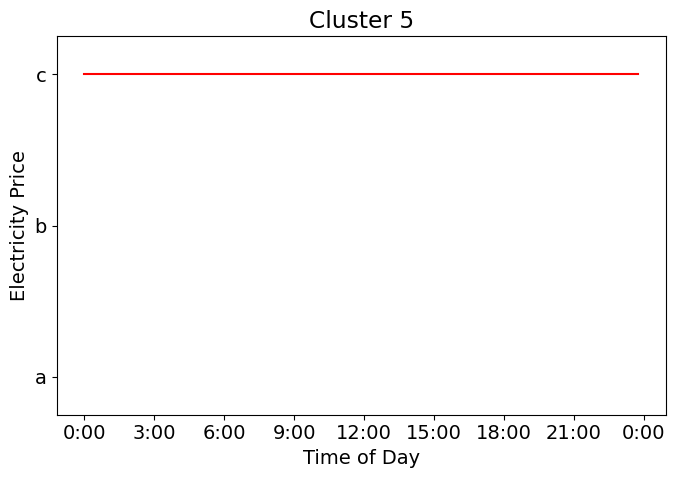

Cluster_5: PAA = [0.80180254 0.83688832 0.86982047 0.85359801 0.83987836 0.86518684
 0.86145574 0.81193004], SAX = CCCCCCCC
3


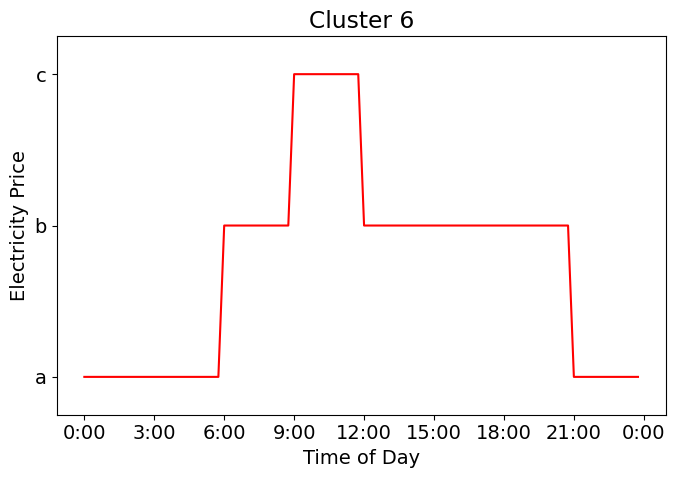

Cluster_6: PAA = [0.22268141 0.32089095 0.64687234 0.73803789 0.62686614 0.61488766
 0.43328125 0.26466319], SAX = AABCBBBA
3


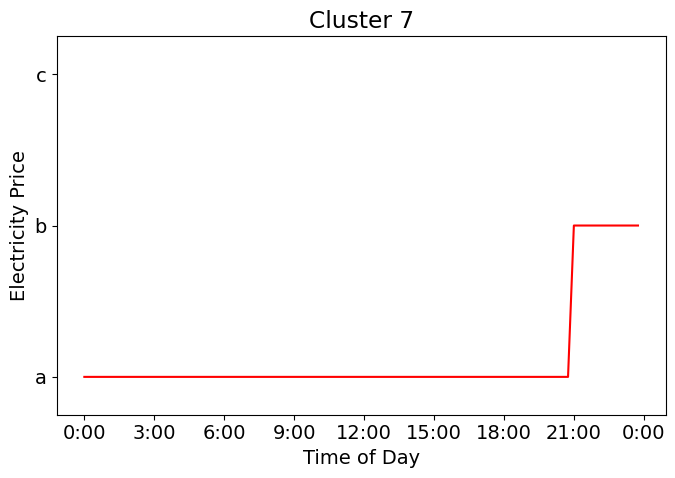

Cluster_7: PAA = [0.29315633 0.16753741 0.12181132 0.13585734 0.11469268 0.1477714
 0.1653702  0.56600093], SAX = AAAAAAAB
3


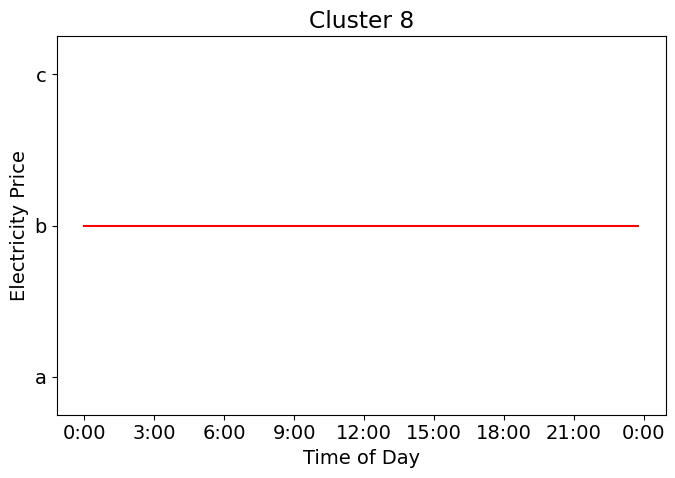

Cluster_8: PAA = [0.58430229 0.4929261  0.37950092 0.39329362 0.34103039 0.34485803
 0.44088431 0.48496853], SAX = BBBBBBBB
3


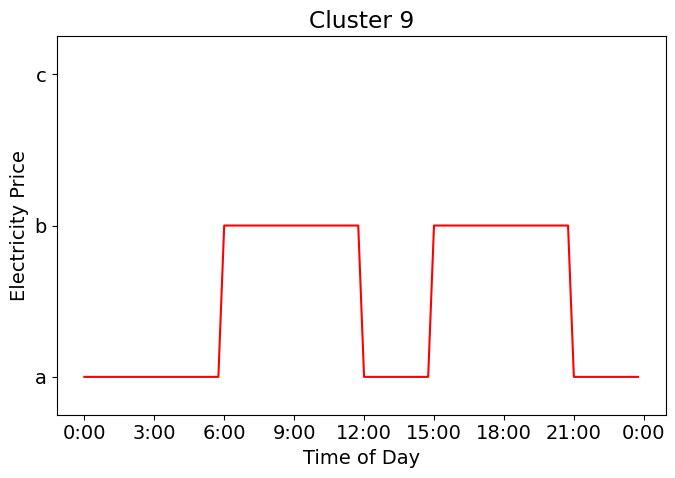

Cluster_9: PAA = [0.14671967 0.21597192 0.34178387 0.44376727 0.30668262 0.48229629
 0.40086436 0.20241506], SAX = AABBABBA
3


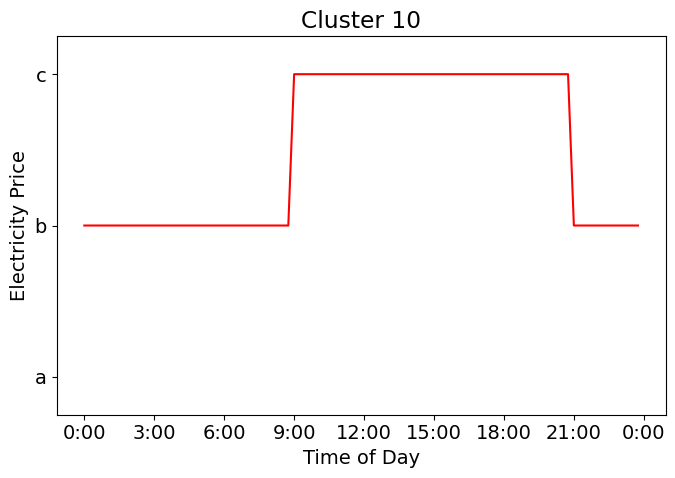

Cluster_10: PAA = [0.45177711 0.51865252 0.6653799  0.73325303 0.67336455 0.77261921
 0.73886342 0.54522149], SAX = BBBCCCCB


In [80]:
# Plotting the ToU tariffs for each cluster
mean_profiles = {f"Cluster_{i+1}": mean_cluster_series(i,0) for i in range(n_clusters)}

sax_profiles = {}
paa_profiles = {}

# Loop through each cluster and compute PAA and SAX representations
for cluster_idx,(cluster_name, profile) in enumerate(mean_profiles.items()):
    paa_rep = paa_transform(profile, segments)
    sax_rep = sax_transform(paa_rep, alphabet_size)
    sax_profiles[cluster_name] = sax_rep
    paa_profiles[cluster_name] = paa_rep
    
    sax = sax_plot(paa_rep, alphabet_size)
    final_plot(sax,cluster_idx)
    print(f"{cluster_name}: PAA = {paa_rep}, SAX = {sax_rep}")
